### Problem Link - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Data Link - https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv

### Things to do :

* Understand the problem statement.
* Extract data.
* Visualize useful information.
* Feature Selection
* Model Training
* Validation


## 1. Loading required Libraries and Dataset

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [5]:
Bank_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv',sep=";")

## 2. Data Exploration

In [6]:
#Information of data
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are we have 45211 observations of 17 variables (7-Numerical Variables and 10-Categorical Variables).

In [8]:
#check for any missing values
Bank_data.apply(lambda x: sum(x.isnull()),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* There are no any explicit missing values for any variable.

In [10]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


* There are many 'unknown' values under Categorical variables.We have to treat them!!!
* 'y' is target variable and we have to predict y(yes/no) using classification algorithms

In [13]:
Bank_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
# Target variable distribution
no_count = 39922
yes_count = 5289
n_percent = no_count/len(Bank_data)*100
y_percent = yes_count/len(Bank_data)*100
print(n_percent)
print(y_percent)

88.30151954170445
11.698480458295547


### *  From the distribution of Target variable, it is found that data is imbalanced becouse there is approx 88% is 'no' and 12% is 'yes'.

### Analysis of Indepedent Numerical Variables

### I have did analysis of each individual variable and checking if there is any outlier values present.
### Outliers can be defined as values out of range [(Q1-1.5*IQR) , (Q3+1.5*IQR)] but here I choose a range based on Maximum and Minimum value for each variable selected by observing Boxplot of corresponding variable.
### After identify, Outlier values will be imputed by "mean" of respective variable by implementation of following "impute_outliers" function.
#### here Q1-First Quartile(25%), Q3-Third Quartile(75%), IQR-Inter Quartile Range

In [16]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [17]:
#lets see statistic of Numerical variables before Outlier treatment
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* From the above result one can see that some variables ('balance', 'duration', 'campaign', 'pdays', 'previous') has outliers.
* That can also visualize through graph further.

In [19]:
#setting dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

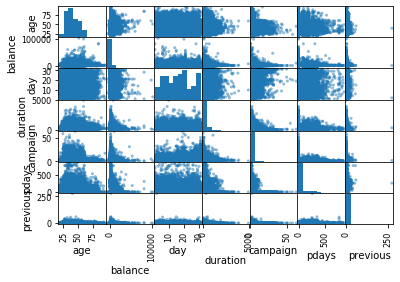

In [22]:
# scatter plot matrix
pd.plotting.scatter_matrix(Bank_data)
plt.show()

* Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).

### Lets analyze all Independent Numerical variables against Target variable 'is_success' by plotting Boxplot. We can easily find outliers through Boxplot.

#### "age"

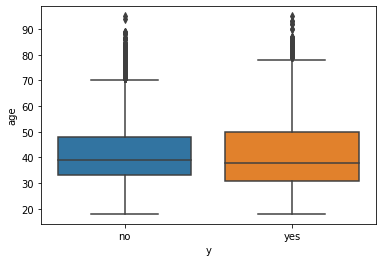

In [25]:
# age
sns.boxplot(x='y', y='age', data=Bank_data)

#### "balance"

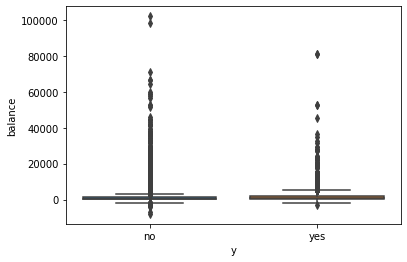

In [27]:
sns.boxplot(x='y', y='balance', data=Bank_data)

In [28]:
# Fixing balance column
dataset_new = Bank_data
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

#### "day"

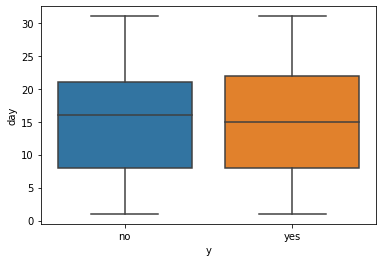

In [29]:
sns.boxplot(x='y', y='day', data=Bank_data)

#### "duration"

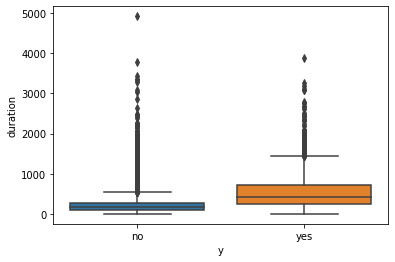

In [30]:
sns.boxplot(x='y', y='duration', data= Bank_data)

In [31]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

#### "compaign"

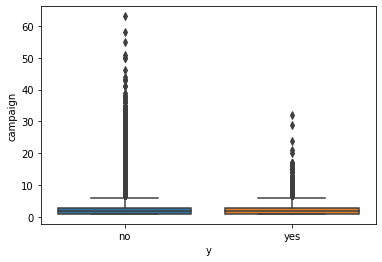

In [32]:
sns.boxplot(x='y', y='campaign', data=Bank_data)

In [33]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

#### "pdays"

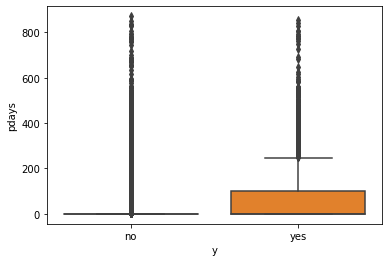

In [34]:
sns.boxplot(x='y', y='pdays', data=Bank_data)

In [35]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

#### "previous"

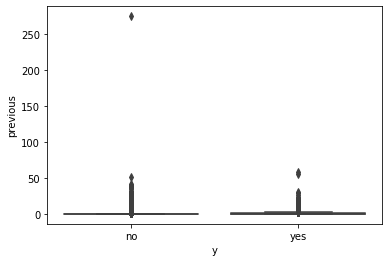

In [36]:
sns.boxplot(x='y', y='previous', data=Bank_data)

In [37]:
# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [38]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


* Now the data seems quite stable comparision to original.

## Analysis of Indepedent Categorical Variables

### Note: 
### 1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
### 2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

In [44]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', Bank_data[column].mode(), col_values)
    return df

#### 'job'

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


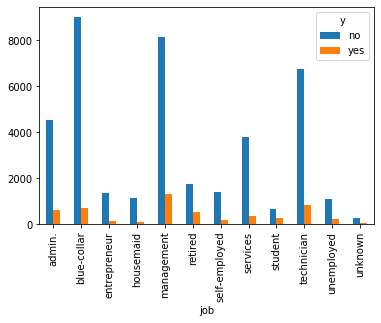

In [42]:
# job
temp1 = pd.crosstab(Bank_data['job'], Bank_data['y'])
temp1.plot(kind='bar')
print(Bank_data.groupby(['job']).size()/len(Bank_data)*100) 

In [45]:
# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

#### "marital"

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


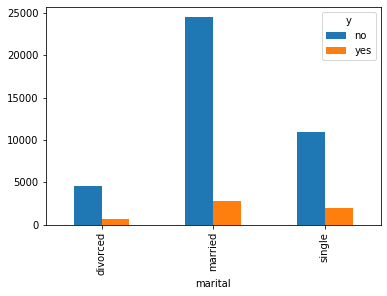

In [47]:
# marital
temp2 = pd.crosstab(Bank_data['marital'], Bank_data['y'])
temp2.plot(kind='bar')
print(Bank_data.groupby(['marital']).size()/len(Bank_data)*100) 

#### "education"

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


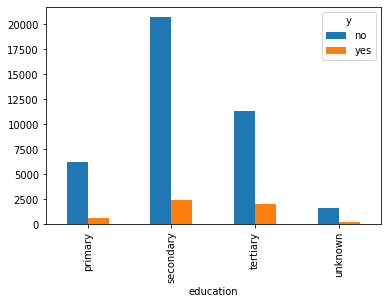

In [48]:
# education
temp3 = pd.crosstab(Bank_data['education'], Bank_data['y'])
temp3.plot(kind='bar')
print(Bank_data.groupby(['education']).size()/len(Bank_data)*100) 

In [49]:
# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

#### "default"

default
no     98.197341
yes     1.802659
dtype: float64


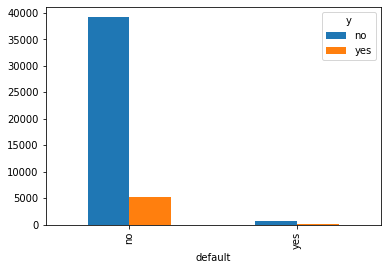

In [50]:
# default
temp4 = pd.crosstab(Bank_data['default'], Bank_data['y'])
temp4.plot(kind='bar')
print(Bank_data.groupby(['default']).size()/len(Bank_data)*100) 

#### This variable seems highly unbalanced (skewed) so we can drop this.

In [51]:
#dropping variable 'default'
del dataset_new['default']

#### "housing"

housing
no     44.416182
yes    55.583818
dtype: float64


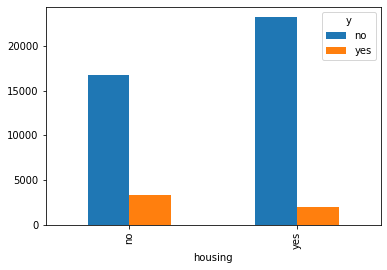

In [52]:
# housing
temp5 = pd.crosstab(Bank_data['housing'], Bank_data['y'])
temp5.plot(kind='bar')
print(Bank_data.groupby(['housing']).size()/len(Bank_data)*100) 

#### "contact"

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


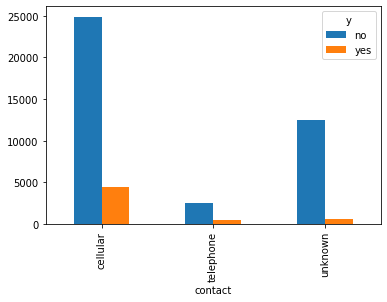

In [53]:
# "contact"
temp6 = pd.crosstab(Bank_data['contact'], Bank_data['y'])
temp6.plot(kind='bar')
print(Bank_data.groupby(['contact']).size()/len(Bank_data)*100) 

In [54]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

#### "month"

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


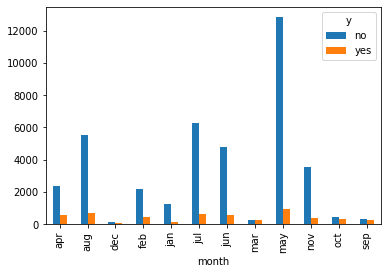

In [55]:
# "month"
temp7 = pd.crosstab(Bank_data['month'], Bank_data['y'])
temp7.plot(kind='bar')
print(Bank_data.groupby(['month']).size()/len(Bank_data)*100) 

#### "poutcome"

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


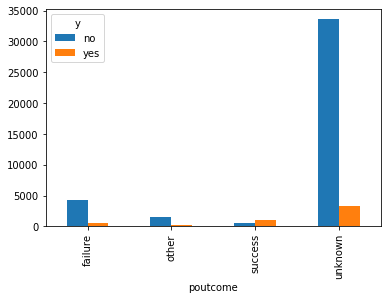

In [56]:
# "poutcome"
temp8 = pd.crosstab(Bank_data['poutcome'], Bank_data['y'])
temp8.plot(kind='bar')
print(Bank_data.groupby(['poutcome']).size()/len(Bank_data)*100) 

* "poutcome" also have more than 81% missing values so we can drop this variable also.

In [57]:
#dropping variable 'poutcome'
del dataset_new['poutcome']

#### "loan"

loan
no     83.977351
yes    16.022649
dtype: float64


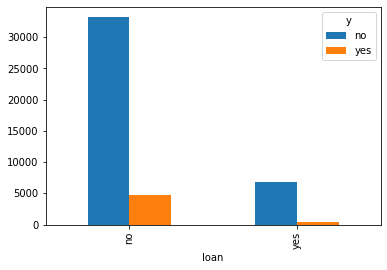

In [58]:
# "loan"
temp9 = pd.crosstab(Bank_data['loan'], Bank_data['y'])
temp9.plot(kind='bar')
print(Bank_data.groupby(['loan']).size()/len(Bank_data)*100) 

### Updated Dataset after Exploratary Data Analysis:

In [59]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
balance      45211 non-null float64
housing      45211 non-null object
loan         45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
y            45211 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 4.8+ MB


### Now total variables are 14 because we have removed 3 categorical variables.

# 3. Feature Engineering

In [60]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['y']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [66]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  balance  day  duration  campaign  pdays  job_admin.  job_blue-collar  \
0   58   2143.0    5     261.0       1.0   -1.0           0                0   
1   44     29.0    5     151.0       1.0   -1.0           0                0   
2   33      2.0    5      76.0       1.0   -1.0           0                0   
3   47   1506.0    5      92.0       1.0   -1.0           0                1   
4   33      1.0    5     198.0       1.0   -1.0           0                1   

   job_entrepreneur  job_housemaid  ...  month_dec  month_feb  month_jan  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          0   
2                 1              0  ...          0          0          0   
3                 0              0  ...          0          0          0   
4                 0              0  ...          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  mont

#### After creating Dummy Variables we have now 39 Variables.

# 4. Feature Selection with PCA

In [69]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [72]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

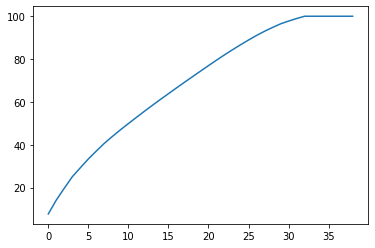

In [74]:
#lets see Cumulative Variance plot
plt.plot(var1)

In [75]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

#### From Cumulative Variance plot we can find that first 32 components are explaining nearly 100% variability of actual data.
#### So we will proceed with only 32 components for further modelling.

In [44]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

# 5. Model Training

In [64]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

#### Implementing Logistic Regression(LR), K-Nearest Neighbor(K-NN) and Decision Tree(CART)

In [62]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [76]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.891755 (0.005013)
K-NN: 0.883958 (0.004866)
CART: 0.854872 (0.005964)


#### "Support Vector Machine" has highest Accuracy but it is taking more time compare to other algorithms for Training.
#### "Logistic Regression" is also has nearly same accuracy and it is very faster than SVM.

# 6. Model Selection

[Text(0, 0, 'LR'), Text(0, 0, 'K-NN'), Text(0, 0, 'CART')]

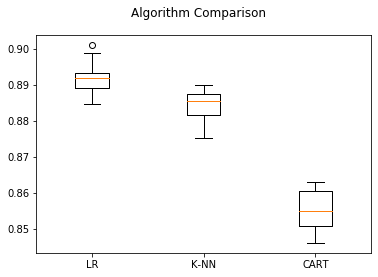

In [77]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#### According to Accuracy and Computation Time Logistic Regression seems the best model.

### Main challenge in this model was Exploratary Data Analysis on Unbalaced Data.
### We can further increase our Model performance by proper data cleaning and model tuning.